<a href="https://colab.research.google.com/github/RamanEbrahimi/CryptocurrencyMarket-Data/blob/main/Cryptocurrency_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install pycoingecko

In [87]:
import pycoingecko
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time
import datetime

In [88]:
def get_crypto_ids_from_CoinGecko():
    """
    Returns list of CoinGecko listed coins
    """
    ids = []
    coin_gecko_list = pycoingecko.CoinGeckoAPI().get_coins_list()
    for i in range(len(coin_gecko_list)):
        ids.append(coin_gecko_list[i]['id'].upper())
    return ids
  

def historical(coin, timefrom, timeto):
    # TIME CONVERSION TO UNIX STAMP
    UNIXtimefrom = time.mktime(datetime.datetime.strptime(timefrom, "%Y-%m-%d").timetuple())
    UNIXtimeto = time.mktime(datetime.datetime.strptime(timeto, "%Y-%m-%d").timetuple())
    
    # DEFINE COINGECKO API (FREE)
    cg = CoinGeckoAPI()
    
    # HISTORICAL DATA API
    history = cg.get_coin_market_chart_range_by_id(id=coin,vs_currency='usd', from_timestamp= UNIXtimefrom, to_timestamp= UNIXtimeto)
      
    # FORMATTING DATAFRAME
    dateList = []
    priceList = []
    for i in history['prices']:
        dateList.append(i[0])
        priceList.append(i[1])
    
    market_capList = []
    for i in history['market_caps']:
        market_capList.append(i[1])
        
    total_volumesList = []
    for i in history['total_volumes']:
        total_volumesList.append(i[1])
    
    df = pd.DataFrame(zip(dateList,priceList,market_capList,total_volumesList) ,columns=['date','usd','market_cap','volume'])
    df['date'] = pd.to_datetime(df['date'],unit='ms')
    df.index = df['date']
    del df['date']

    return df

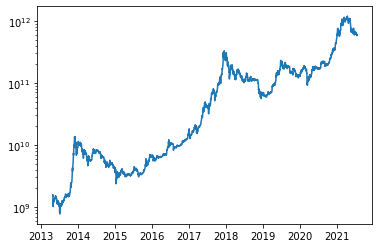

In [90]:
time1 = '2013-01-01'
time2 = '2021-08-20'
ids = get_crypto_ids_from_CoinGecko()
bitcoin = historical('bitcoin', time1, time2)
plt.plot(bitcoin['market_cap'])
plt.yscale('log')

#  total_data = []
#  td = pd.DataFrame(total_data)
#  for coin in ids:
#    if historical(coin, time1, time2):
#      respond = historical(coin, time1, time2)
#      td.append(respond, ignore_index = True)